## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
application_df.shape

(34299, 12)

In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME', gets rid of noise
application_df = application_df.drop(columns=['EIN', 'NAME', 'STATUS', 'SPECIAL_CONSIDERATIONS'])

application_df.head()


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,142590,1


In [4]:
# Determine the number of unique values in each column.
unique_values = application_df.nunique()
print(unique_values)

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64


In [5]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
# "Other" category simplfies the data set by reducing the unique categories with low frequency values into
# a single category 
application_type_counts = application_df['APPLICATION_TYPE'].value_counts()
print(application_type_counts)

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64


In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`

cutoff = 500
application_types_to_replace = application_type_counts[application_type_counts < cutoff].index.tolist()


# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()


APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"

classification_counts = application_df['CLASSIFICATION'].value_counts()

classifications_to_replace = classification_counts[classification_counts < cutoff].index.tolist()
classifications_to_replace

['C1700',
 'C4000',
 'C5000',
 'C1270',
 'C2700',
 'C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C7200',
 'C2300',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C1800',
 'C6000',
 'C1250',
 'C8200',
 'C1238',
 'C1278',
 'C1235',
 'C1237',
 'C7210',
 'C2400',
 'C1720',
 'C4100',
 'C1257',
 'C1600',
 'C1260',
 'C2710',
 'C0',
 'C3200',
 'C1234',
 'C1246',
 'C1267',
 'C1256',
 'C2190',
 'C4200',
 'C2600',
 'C5200',
 'C1370',
 'C1248',
 'C6100',
 'C1820',
 'C1900',
 'C1236',
 'C3700',
 'C2570',
 'C1580',
 'C1245',
 'C2500',
 'C1570',
 'C1283',
 'C2380',
 'C1732',
 'C1728',
 'C2170',
 'C4120',
 'C8210',
 'C2561',
 'C4500',
 'C2150']

In [8]:
# You may find it helpful to look at CLASSIFICATION value counts >1

classification_counts_filtered = classification_counts[classification_counts > 10]

classification_counts_filtered

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
Name: count, dtype: int64

In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`

cutoff = 1883
classifications_to_replace = classification_counts[classification_counts < cutoff].index.tolist()

# Replace in dataframe

for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful

application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [10]:
# Convert categorical data to numeric with `pd.get_dummies
# These columns are the features for the model, used to train the model to predict target variable

df_dummies = pd.get_dummies(application_df, columns=['APPLICATION_TYPE','INCOME_AMT', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE', 'ORGANIZATION'])

# Convert 'INCOME_AMT' ranges to a single numeric value

print(df_dummies)

        ASK_AMT  IS_SUCCESSFUL  APPLICATION_TYPE_Other  APPLICATION_TYPE_T10  \
0          5000              1                   False                  True   
1        108590              1                   False                 False   
2          5000              0                   False                 False   
3          6692              1                   False                 False   
4        142590              1                   False                 False   
...         ...            ...                     ...                   ...   
34294      5000              0                   False                 False   
34295      5000              0                   False                 False   
34296      5000              0                   False                 False   
34297      5000              1                   False                 False   
34298  36500179              0                   False                 False   

       APPLICATION_TYPE_T19  APPLICATIO

In [11]:
# Split our preprocessed data into our features and target arrays
# 'IS_SUCCESSFUL' is the target variable

X = df_dummies.drop(columns=['IS_SUCCESSFUL'])
y = df_dummies['IS_SUCCESSFUL']


# Split the preprocessed data into a training and testing dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [12]:
#  X reviewing dataframe

X

,ASK_AMT,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust
0,5000,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
1,108590,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
2,5000,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,True,False,False,False
3,6692,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4,142590,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,5000,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
34295,5000,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
34296,5000,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
34297,5000,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,True,False,False,False


In [13]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [14]:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=100, activation="elu", input_dim=X_train_scaled.shape[1]))
nn_model.add(tf.keras.layers.Dense(units=75, activation="elu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


/Users/keycaughey/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:

X_train.shape

(25724, 40)

In [16]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [17]:
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=80)

keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              verbose=0, mode='auto')

Epoch 1/80
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 391us/step - accuracy: 0.7057 - loss: 0.5956
Epoch 2/80
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.7291 - loss: 0.5614
Epoch 3/80
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - accuracy: 0.7280 - loss: 0.5587
Epoch 4/80
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - accuracy: 0.7311 - loss: 0.5540
Epoch 5/80
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.7290 - loss: 0.5554
Epoch 6/80
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.7249 - loss: 0.5581
Epoch 7/80
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.7315 - loss: 0.5490
Epoch 8/80
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.7308 - loss: 0.5499
Epoch 9/80
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.7326 - loss: 0.5510
Epoch 10/80
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.7334 - loss: 0.5500
Epoch 11/80
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - accuracy: 0.7376 - loss: 0.5460
Epoch 12/80
804/804 ━━━━━━━━━━

804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.7407 - loss: 0.5356
Epoch 68/80
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.7393 - loss: 0.5404
Epoch 69/80
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.7351 - loss: 0.5424
Epoch 70/80
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.7383 - loss: 0.5390
Epoch 71/80
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.7418 - loss: 0.5365
Epoch 72/80
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.7366 - loss: 0.5392
Epoch 73/80
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.7381 - loss: 0.5409
Epoch 74/80
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.7397 - loss: 0.5387
Epoch 75/80
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.7389 - loss: 0.5371
Epoch 76/80
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.7391 - loss: 0.5416
Epoch 77/80
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.7410 - loss: 0.5397
Epoch 78/80
804/804 ━━━━━━━━━━━━━

NameError: name 'keras' is not defined

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)

#model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
#print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
print(f"Loss: {model_loss:.4f}")
print(f"Accuracy: {model_accuracy:.4f}")

268/268 - 0s - 471us/step - accuracy: 0.7261 - loss: 0.5521
Loss: 0.5521
Accuracy: 0.7261


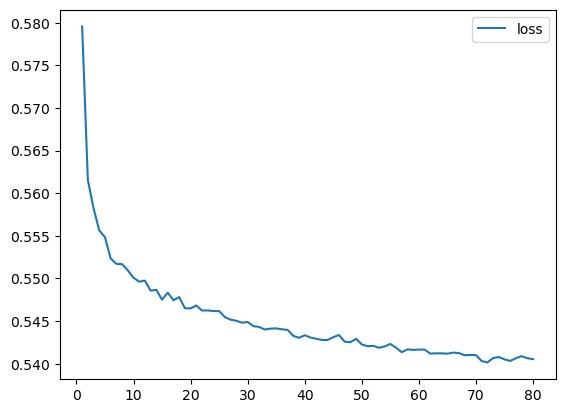

In [19]:
import matplotlib.pyplot as plt
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

In [20]:
# Export our model to HDF5 file
nn_model.save("trained_model.h5")


## Another model I tried that gave similar results

In [ ]:

# Define the number of input features
#input_features = X_train_scaled.shape[1]

# Define the model - deep neural net
#model = Sequential()

# First hidden layer
#model.add(Dense(units=80, input_dim=input_features, activation='relu'))

# Second hidden layer
#model.add(Dense(units=30, activation='relu'))

# Output layer
#model.add(Dense(units=1, activation='sigmoid'))

# Summary of the model
#model.summary()

# OVERVIEW

## The purpose of this analysis was to create a binary classifier that can predict if applicants success when funded by Alphabet Soup

# RESULTS

## Data Preprocessing

###    - The target variable  is 'IS_SUCCESSFUL'
###    - The feature variables are 'APPLICATION_TYPE',	'AFFILIATION',	'CLASSIFICATION	USE_CASE',	'ORGANIZATION',	'INCOME_AMT',	'ASK_AMT'	
###    - The variables removed where 'EIN', 'NAME', 'STATUS', 'SPECIAL_CONSIDERATIONS', more could be removed but we would have to ask user how pertenant to thier decision each column would be.

## Compiling, Training, and Evaluating the Model

### I used 2 hidden layers with 100 neurons in first layer and 60 neurons in second layer and 'elu' as the activation function. The target of 75 was not achieved after multiple attempts even after changing model, neurons and trying various activation functions.

# SUMMARY

### The overall results for both models I tried had similar results, neither were able to achieve .75 accuracy. I tried various neurons, epochs and activation functions with 'elu' performing slightly better and 100/60 neurons having slightly better results than other combinations. Adding more neurons and epochs did not improve the results. I would recomend dropping more columns, asking user what features could be noise in the model.
